In [57]:
import pandas as pd
import numpy as np
import matplotlib as pl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [58]:
#read raw data from the file
path='C:\\Users\\honey\\Desktop\\DM project\\Dataset.csv'
df=pd.read_csv(path)
df.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,1,2596,51,3,258,0,510,221,232,148,...,0,0,0,0,0,0,0,0,0,5
1,2,2590,56,2,212,-6,390,220,235,151,...,0,0,0,0,0,0,0,0,0,5
2,3,2804,139,9,268,65,3180,234,238,135,...,0,0,0,0,0,0,0,0,0,2
3,4,2785,155,18,242,118,3090,238,238,122,...,0,0,0,0,0,0,0,0,0,2
4,5,2595,45,2,153,-1,391,220,234,150,...,0,0,0,0,0,0,0,0,0,5


In [59]:
#drop the first column 'ID' since it just has serial no ,not useful in prediction
df=df.iloc[:,1:]
df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


In [60]:
#size of the dataframes
print(df.shape)
#we can see that there are 15120 instances with 55 attributes

(15120, 55)


In [61]:
#datatypes of the attribues
print(df.dtypes)

Elevation                             int64
Aspect                                int64
Slope                                 int64
Horizontal_Distance_To_Hydrology      int64
Vertical_Distance_To_Hydrology        int64
Horizontal_Distance_To_Roadways       int64
Hillshade_9am                         int64
Hillshade_Noon                        int64
Hillshade_3pm                         int64
Horizontal_Distance_To_Fire_Points    int64
Wilderness_Area1                      int64
Wilderness_Area2                      int64
Wilderness_Area3                      int64
Wilderness_Area4                      int64
Soil_Type1                            int64
Soil_Type2                            int64
Soil_Type3                            int64
Soil_Type4                            int64
Soil_Type5                            int64
Soil_Type6                            int64
Soil_Type7                            int64
Soil_Type8                            int64
Soil_Type9                      

In [62]:
x=df.values[:,54]
x

array([5, 5, 2, ..., 3, 3, 3], dtype=int64)

In [63]:
y=df.values[:,-1]
y

array([5, 5, 2, ..., 3, 3, 3], dtype=int64)

In [64]:
# Number of instances belonging to each class

df.groupby('Cover_Type').size()


# We see that all classes have an equal presence.
#No class re-balancing is necessary

Cover_Type
1    2160
2    2160
3    2160
4    2160
5    2160
6    2160
7    2160
dtype: int64

*Data Interpretation*

In [65]:

# Correlation tells relation between two attributes.
# Correlation requires continous data. Hence, ignore Wilderness_Area and Soil_Type as they are binary

#sets the number of features considered
size = 10 

#create a dataframe with only 'size' features
data=df.iloc[:,:size] 

#get the names of all the columns
cols=data.columns 

# Calculates pearson co-efficient for all combinations
data_corr = data.corr()

# Set the threshold to select only only highly correlated attributes
threshold = 0.5

# List of pairs along with correlation above threshold
corr_list = []

#Search for the highly correlated pairs
for i in range(0,size): #for 'size' features
    for j in range(i+1,size): #avoid repetition
        if (data_corr.iloc[i,j] >= threshold and data_corr.iloc[i,j] < 1) or (data_corr.iloc[i,j] < 0 and data_corr.iloc[i,j] <= -threshold):
            corr_list.append([data_corr.iloc[i,j],i,j]) #store correlation and columns index

#Sort to show higher ones first            
s_corr_list = sorted(corr_list,key=lambda x: -abs(x[0]))

#Print correlations and column names
for v,i,j in s_corr_list:
    print ("%s and %s = %.2f" % (cols[i],cols[j],v))

# Strong correlation is observed between the following pairs
# This represents an opportunity to reduce the feature set through transformations such as PC

Hillshade_9am and Hillshade_3pm = -0.78
Horizontal_Distance_To_Hydrology and Vertical_Distance_To_Hydrology = 0.65
Aspect and Hillshade_3pm = 0.64
Hillshade_Noon and Hillshade_3pm = 0.61
Slope and Hillshade_Noon = -0.61
Aspect and Hillshade_9am = -0.59
Elevation and Horizontal_Distance_To_Roadways = 0.58


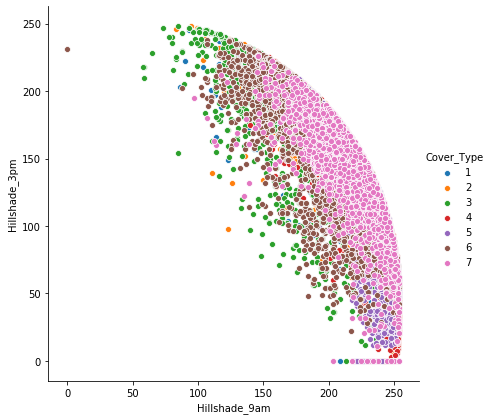

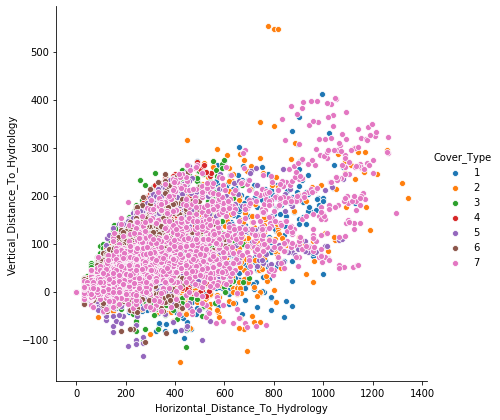

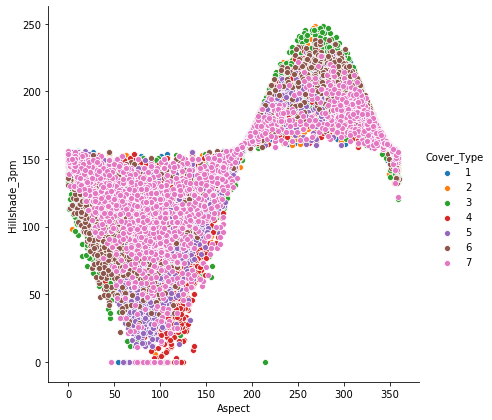

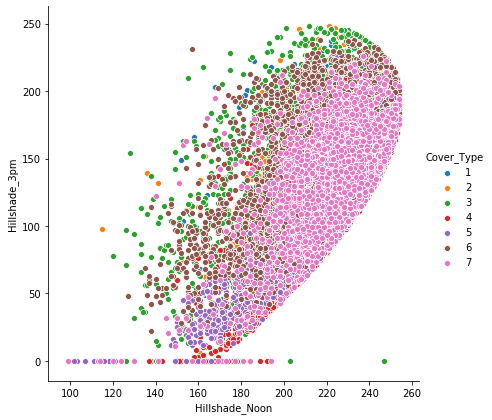

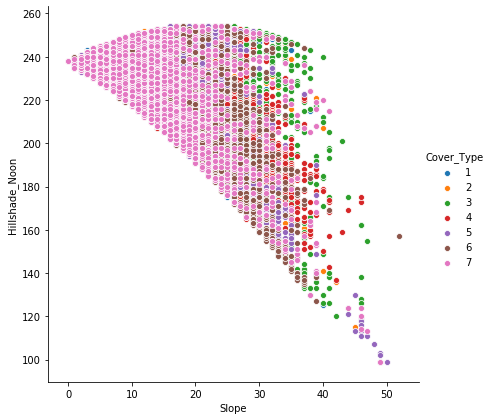

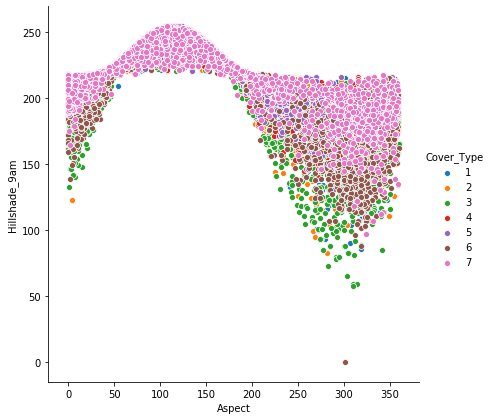

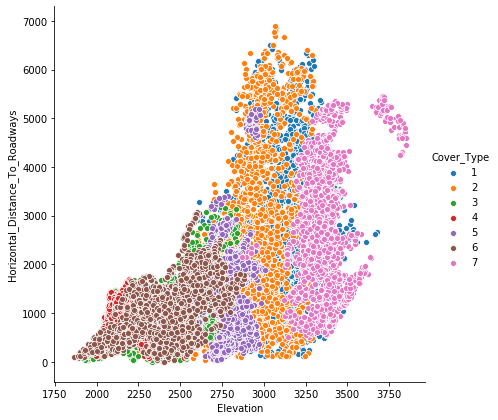

In [66]:
# Scatter plot of only the highly correlated pairs
for v,i,j in s_corr_list:
    sns.pairplot(df, hue="Cover_Type", size=6, x_vars=cols[i],y_vars=cols[j] )
    plt.show()

#The plots show to which class does a point belong to. The class distribution overlaps in the plots.    
#Hillshade patterns give a nice ellipsoid patterns with each other
#Aspect and Hillshades attributes form a sigmoid pattern
#Horizontal and vertical distance to hydrology give an almost linear pattern.

### Data Visualization

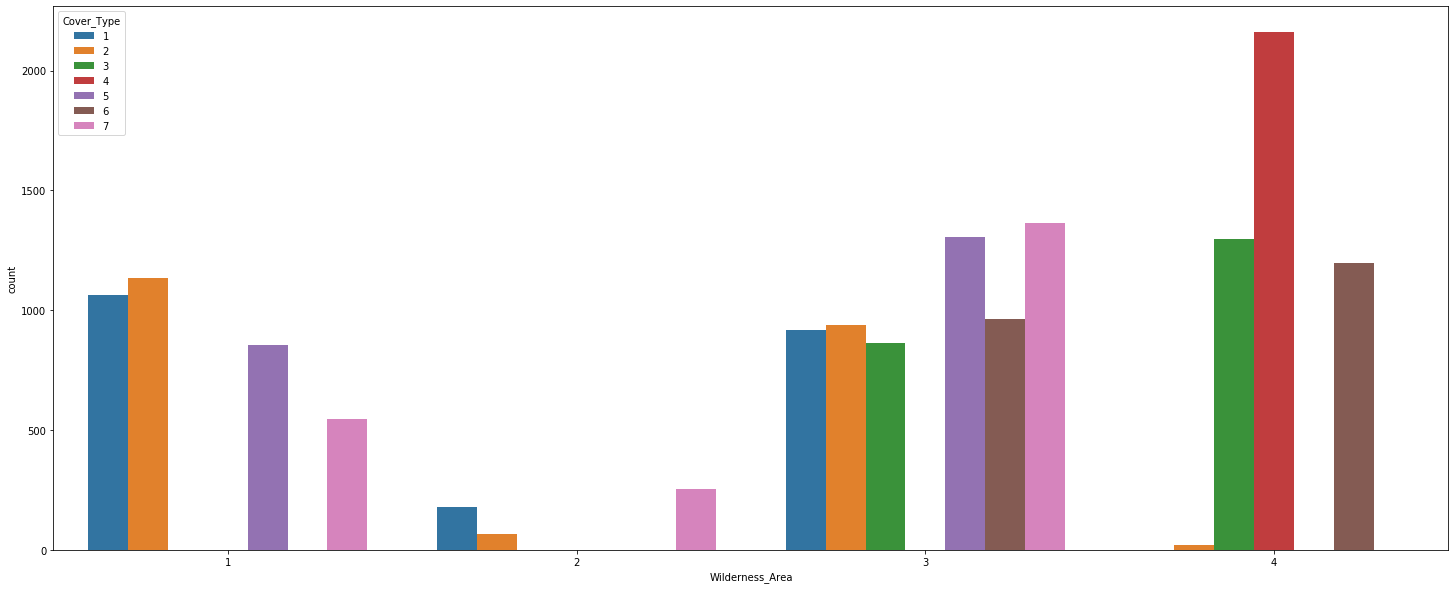

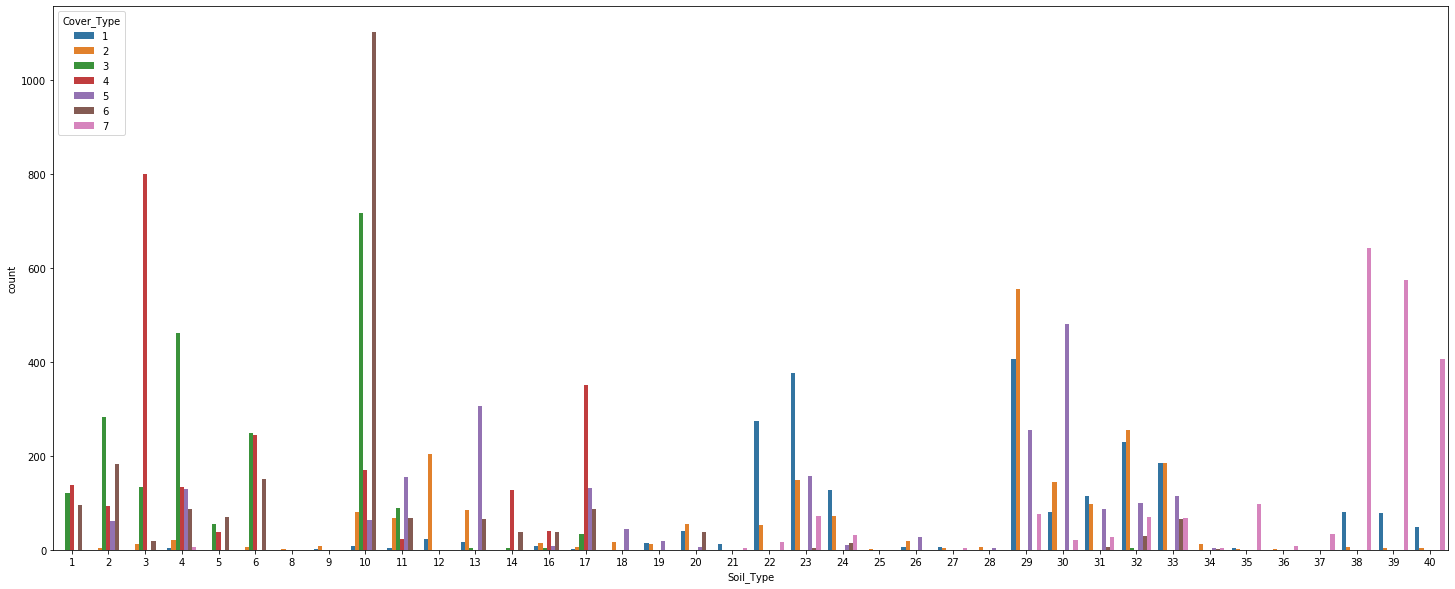

In [70]:
#Grouping of one hot encoded attributes
# Group one-hot encoded variables of a category into one single variable

#names of all the columns
cols = df.columns

#number of rows=r , number of columns=c
r,c = df.shape

#Create a new dataframe with r rows, one column for each encoded category, and target in the end
data = pd.DataFrame(index=np.arange(0, r),columns=['Wilderness_Area','Soil_Type','Cover_Type'])

#Make an entry in 'data' for each r as category_id, target value
for i in range(0,r):
    w=0;
    s=0;
    # Category1 range
    for j in range(10,14):
        if (df.iloc[i,j] == 1):
            w=j-9  #category class
            break
    # Category2 range        
    for k in range(14,54):
        if (df.iloc[i,k] == 1):
            s=k-13 #category class
            break
    #Make an entry in 'data' for each r as category_id, target value        
    data.iloc[i]=[w,s,df.iloc[i,c-1]]

#Plot for Category1    
sns.countplot(x="Wilderness_Area", hue="Cover_Type", data=data)
plt.show()
#Plot for Category2
plt.rc("figure", figsize=(25, 10))
sns.countplot(x="Soil_Type", hue="Cover_Type", data=data)
plt.show()

#(right-click and open the image in a new window for larger size)
#WildernessArea_4 has a lot of presence for cover_type 4. Good class distinction
#WildernessArea_3 has not much class distinction
#SoilType 1-6,10-14,17, 22-23, 29-33,35,38-40 offer lot of class distinction as counts for some are very high

### Data Cleaning

In [71]:
#remove unnecessary columns
#Removal list initialize
rem = []

#Add constant columns as they don't help in prediction process
for c in df.columns:
    if df[c].std() == 0: #standard deviation is zero
        rem.append(c)

#drop the columns        
df.drop(rem,axis=1,inplace=True)

print(rem)

#Following columns are dropped

['Soil_Type7', 'Soil_Type15']


### Data Preparation

In [76]:
#Original
#Delete rows or impute values in case of missing
#standardScaler
#MinMaxScaler
#Normalizer

#get the no of rows and columns
r, c = df.shape

#get the list of columns
cols = df.columns
#create an array which has indexes of columns
i_cols = []
for i in range(0,c-1):
    i_cols.append(i)
#array of importance rank of all features  
ranks = []

#Extract only the values
array = df.values

#Y is the target column, X has the rest
X = array[:,0:(c-1)]
Y = array[:,(c-1)]

#Validation chunk size
val_size = 0.1

#Use a common seed in all experiments so that same chunk is used for validation
seed = 0

#Split the data into chunks
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val =train_test_split(X, Y, test_size=val_size, random_state=seed)

#Import libraries for data transformations
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer

#All features
X_all = []
#Additionally we will make a list of subsets
X_all_add =[]
#columns to be dropped
rem = []
#indexes of columns to be dropped
i_rem = []

#List of combinations
comb = []
comb.append("All+1.0")

#Add this version of X to the list 
X_all.append(['Orig','All', X_train,X_val,1.0,cols[:c-1],rem,ranks,i_cols,i_rem])

#point where categorical data begins
size=10

#Standardized
#Apply transform only for non-categorical data
X_temp = StandardScaler().fit_transform(X_train[:,0:size])
X_val_temp = StandardScaler().fit_transform(X_val[:,0:size])
#Concatenate non-categorical data and categorical
X_con = np.concatenate((X_temp,X_train[:,size:]),axis=1)
X_val_con = np.concatenate((X_val_temp,X_val[:,size:]),axis=1)
#Add this version of X to the list 
X_all.append(['StdSca','All', X_con,X_val_con,1.0,cols,rem,ranks,i_cols,i_rem])

#MinMax
#Apply transform only for non-categorical data
X_temp = MinMaxScaler().fit_transform(X_train[:,0:size])
X_val_temp = MinMaxScaler().fit_transform(X_val[:,0:size])
#Concatenate non-categorical data and categorical
X_con = np.concatenate((X_temp,X_train[:,size:]),axis=1)
X_val_con = np.concatenate((X_val_temp,X_val[:,size:]),axis=1)
#Add this version of X to the list 
X_all.append(['MinMax', 'All', X_con,X_val_con,1.0,cols,rem,ranks,i_cols,i_rem])

#Normalize
#Apply transform only for non-categorical data
X_temp = Normalizer().fit_transform(X_train[:,0:size])
X_val_temp = Normalizer().fit_transform(X_val[:,0:size])
#Concatenate non-categorical data and categorical
X_con = np.concatenate((X_temp,X_train[:,size:]),axis=1)
X_val_con = np.concatenate((X_val_temp,X_val[:,size:]),axis=1)
#Add this version of X to the list 
X_all.append(['Norm', 'All', X_con,X_val_con,1.0,cols,rem,ranks,i_cols,i_rem])

#Impute
#Imputer is not used as no data is missing

#List of transformations
trans_list = []

for trans,name,X,X_val,v,cols_list,rem_list,rank_list,i_cols_list,i_rem_list in X_all:
    trans_list.append(trans)

<b>Knn Classifier:</b>

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

In [28]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)

In [29]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)
knn.score(x_test, y_test)

0.8389550264550265

In [30]:
predictionsDT=knn.predict(x_test)
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,predictionsDT))

[[325  54   0   0  10   1  45]
 [ 87 241  16   0  49  18   7]
 [  0   7 321  35  13  38   0]
 [  0   0  11 433   0   7   0]
 [  5   6   4   0 413   2   0]
 [  1   8  33  19   2 370   0]
 [  7   2   0   0   0   0 434]]


<b>Naive bayes:</b>

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB

In [32]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)

In [33]:
gnb=GaussianNB()
gnb.fit(x_train,y_train)
print("Accuracy:",gnb.score(x_test, y_test))

Accuracy: 0.6018518518518519


In [34]:
predictionsNB=gnb.predict(x_test)
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,predictionsNB))

[[323   7   1   0  42   1  61]
 [206  53  34   1 108   1  15]
 [  1   0 320  80  12   1   0]
 [  0   0  36 415   0   0   0]
 [ 56   6  59   0 308   1   0]
 [  8   0 287  74  36  28   0]
 [ 61   2   3   0   4   0 373]]


<b>Random Forest Using sklearn:</b>

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier

In [37]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)

In [38]:
rcl=RandomForestClassifier(n_estimators=100)
rcl.fit(x_train,y_train)
print("Accuracy:",rcl.score(x_test,y_test))

Accuracy: 0.8640873015873016


In [18]:
predictionsRF=rcl.predict(x_test)
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,predictionsRF))

[[337  67   1   0   5   0  25]
 [ 63 299   9   0  25  14   8]
 [  0   4 335  21   5  49   0]
 [  0   0  12 434   0   5   0]
 [  1  12   5   0 407   5   0]
 [  0   3  39  13   3 375   0]
 [ 18   0   0   0   0   0 425]]


<b>Gradient Boosting Using sklearn:</b>

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import GradientBoostingClassifier

In [40]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)

In [41]:
gbr=GradientBoostingClassifier(n_estimators=500) 
gbr.fit(x_train, y_train) 
print("Accuracy:",gbr.score(x_test,y_test))

Accuracy: 0.841931216931217


In [22]:
predictionsGB=gbr.predict(x_test)
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,predictionsGB))

[[338  66   1   0   4   0  26]
 [ 76 270   9   0  46  10   7]
 [  0   5 323  19  10  56   1]
 [  0   0  12 434   0   5   0]
 [  3  16   5   0 400   6   0]
 [  2   5  50   9   4 363   0]
 [ 12   1   0   0   1   0 429]]


<b>Feed Forward Neural Network:</b>

In [3]:
#loading the data
covtype = pd.read_csv("Train.csv", sep=",")
covtype = covtype.reindex(
    np.random.permutation(covtype.index)) # randomize the position of records

In [4]:
covtype.head() #checking the data index was radomized

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
8898,8899,2885,67,18,190,106,2097,235,200,90,...,0,1,0,0,0,0,0,0,0,2
2332,2333,2782,330,21,30,16,1550,165,209,181,...,0,0,0,0,0,0,0,0,0,6
9295,9296,3263,143,19,180,39,2873,243,233,110,...,0,0,0,0,0,0,0,1,0,1
1819,1820,2570,345,12,124,42,859,196,221,163,...,0,0,0,0,0,0,0,0,0,5
10703,10704,3160,77,9,470,49,424,232,223,122,...,0,0,0,0,0,0,0,0,0,1


In [5]:
covtype.shape #number of records

(15120, 56)

In [6]:
covtype['Cover_Type'].unique()

array([2, 6, 1, 5, 4, 3, 7])

In [7]:
covtype['Cover_Type']=covtype['Cover_Type'].astype('category') # convert to categorical datatype for multiple output prediction

In [8]:
#target is categorical data, we convert it into dummies
dummies= pd.get_dummies(covtype, columns=['Cover_Type'])

In [9]:
dummies.shape

(15120, 62)

In [10]:
one_hot_code=dummies # assign dataset to one_hot_code

#one_hot_code=covtype
one_hot_code.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type_1,Cover_Type_2,Cover_Type_3,Cover_Type_4,Cover_Type_5,Cover_Type_6,Cover_Type_7
8898,8899,2885,67,18,190,106,2097,235,200,90,...,0,0,0,0,1,0,0,0,0,0
2332,2333,2782,330,21,30,16,1550,165,209,181,...,0,0,0,0,0,0,0,0,1,0
9295,9296,3263,143,19,180,39,2873,243,233,110,...,0,1,0,1,0,0,0,0,0,0
1819,1820,2570,345,12,124,42,859,196,221,163,...,0,0,0,0,0,0,0,1,0,0
10703,10704,3160,77,9,470,49,424,232,223,122,...,0,0,0,1,0,0,0,0,0,0


In [11]:
one_hot_code.columns #easier to copy column names for next code

Index(['Id', 'Elevation', 'Aspect', 'Slope',
       'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology',
       'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon',
       'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points',
       'Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3',
       'Wilderness_Area4', 'Soil_Type1', 'Soil_Type2', 'Soil_Type3',
       'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type7', 'Soil_Type8',
       'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12',
       'Soil_Type13', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16',
       'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20',
       'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24',
       'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28',
       'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32',
       'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36',
       'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_

In [12]:
one_hot_code

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type_1,Cover_Type_2,Cover_Type_3,Cover_Type_4,Cover_Type_5,Cover_Type_6,Cover_Type_7
8898,8899,2885,67,18,190,106,2097,235,200,90,...,0,0,0,0,1,0,0,0,0,0
2332,2333,2782,330,21,30,16,1550,165,209,181,...,0,0,0,0,0,0,0,0,1,0
9295,9296,3263,143,19,180,39,2873,243,233,110,...,0,1,0,1,0,0,0,0,0,0
1819,1820,2570,345,12,124,42,859,196,221,163,...,0,0,0,0,0,0,0,1,0,0
10703,10704,3160,77,9,470,49,424,232,223,122,...,0,0,0,1,0,0,0,0,0,0
12578,12579,2111,308,5,0,0,1025,205,237,171,...,0,0,0,0,0,0,1,0,0,0
256,257,3011,85,5,842,85,5389,228,231,137,...,0,0,0,0,1,0,0,0,0,0
13147,13148,2321,18,10,0,0,283,213,220,143,...,0,0,0,0,0,0,1,0,0,0
3984,3985,2152,45,14,0,0,1167,223,210,118,...,0,0,0,0,0,0,1,0,0,0
1254,1255,2987,352,13,228,14,2554,197,218,158,...,0,0,0,1,0,0,0,0,0,0


In [13]:
mean_tr=1
std_tr=1

In [14]:
def preprocess_features(one_hot_code, batch_norm_required):
    selected_features = one_hot_code[ # features that will be used for training data
    [ 'Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1',
       'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4',
       'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5',
       'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10',
       'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14',
       'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18',
       'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22',
       'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26',
       'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30',
       'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34',
       'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38',
       'Soil_Type39', 'Soil_Type40']]
    batch_norm = selected_features[['Aspect','Elevation',  'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points']] 
    if batch_norm_required:
        global mean_tr, std_tr
        mean_tr=batch_norm.mean()
        std_tr=batch_norm.std()
     
    batch_norm=(batch_norm-mean_tr)/std_tr
    selected_features.update(batch_norm)

        
    # Add noise
    processed_features = selected_features.copy()  
    
    return selected_features

def preprocess_targets(one_hot_code): # targets that are used for adjusting the model
    output_targets = one_hot_code[
        [ 
        'Cover_Type_1' , 'Cover_Type_2',
       'Cover_Type_3', 'Cover_Type_4', 'Cover_Type_5', 'Cover_Type_6',
       'Cover_Type_7'
        ]]
    return output_targets

In [15]:
# Train and test sets
# Choose examples for training.
training_examples = preprocess_features(one_hot_code.head(464808), 1)
training_targets = preprocess_targets(one_hot_code.head(464808))

# Choose examples for validation.
validation_examples = preprocess_features(one_hot_code.tail(116203), 0)
validation_targets = preprocess_targets(one_hot_code.tail(116203))

# Double-check that we've done the right thing.
print("Training examples summary:")
display.display(training_examples.describe())
print("Validation examples summary:")
display.display(validation_examples.describe())

print("Training targets summary:")
display.display(training_targets.describe())
print("Validation targets summary:")
display.display(validation_targets.describe())

/home/phanindra/.local/lib/python3.6/site-packages/pandas/core/frame.py:5085: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[col] = expressions.where(mask, this, that)


Training examples summary:


,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
count,1.512000e+04,1.512000e+04,1.512000e+04,1.512000e+04,1.512000e+04,1.512000e+04,1.512000e+04,1.512000e+04,1.512000e+04,1.512000e+04,...,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000
mean,3.512769e-16,1.184238e-16,-2.027772e-16,1.691768e-17,-1.386310e-17,1.043257e-16,-4.027349e-16,4.929625e-16,6.626093e-17,1.009187e-16,...,0.021958,0.045635,0.040741,0.001455,0.006746,0.000661,0.002249,0.048148,0.043452,0.030357
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,0.146550,0.208699,0.197696,0.038118,0.081859,0.025710,0.047368,0.214086,0.203880,0.171574
min,-2.122023e+00,-1.423223e+00,-1.951943e+00,-1.081497e+00,-3.218132e+00,-1.293538e+00,-6.959926e+00,-5.261196e+00,-2.943489e+00,-1.373850e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-8.938043e-01,-8.327745e-01,-7.690612e-01,-7.625633e-01,-7.523999e-01,-7.169627e-01,-5.465836e-01,-5.247622e-01,-6.338790e-01,-7.101749e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,6.410311e-03,-2.786613e-01,-1.776201e-01,-2.246609e-01,-3.115073e-01,-3.003798e-01,2.387236e-01,1.769317e-01,6.336182e-02,-2.319655e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8.491644e-01,9.476549e-01,6.503975e-01,4.893688e-01,4.559724e-01,4.195841e-01,7.295406e-01,7.032022e-01,6.952363e-01,4.337548e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2.632834e+00,1.846953e+00,4.199044e+00,5.311449e+00,8.212416e+00,3.906202e+00,1.351242e+00,1.536464e+00,2.460127e+00,4.983790e+00,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Validation examples summary:


,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
count,1.512000e+04,1.512000e+04,1.512000e+04,1.512000e+04,1.512000e+04,1.512000e+04,1.512000e+04,1.512000e+04,1.512000e+04,1.512000e+04,...,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000
mean,3.512769e-16,1.184238e-16,-2.027772e-16,1.691768e-17,-1.386310e-17,1.043257e-16,-4.027349e-16,4.929625e-16,6.626093e-17,1.009187e-16,...,0.021958,0.045635,0.040741,0.001455,0.006746,0.000661,0.002249,0.048148,0.043452,0.030357
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,0.146550,0.208699,0.197696,0.038118,0.081859,0.025710,0.047368,0.214086,0.203880,0.171574
min,-2.122023e+00,-1.423223e+00,-1.951943e+00,-1.081497e+00,-3.218132e+00,-1.293538e+00,-6.959926e+00,-5.261196e+00,-2.943489e+00,-1.373850e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-8.938043e-01,-8.327745e-01,-7.690612e-01,-7.625633e-01,-7.523999e-01,-7.169627e-01,-5.465836e-01,-5.247622e-01,-6.338790e-01,-7.101749e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,6.410311e-03,-2.786613e-01,-1.776201e-01,-2.246609e-01,-3.115073e-01,-3.003798e-01,2.387236e-01,1.769317e-01,6.336182e-02,-2.319655e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8.491644e-01,9.476549e-01,6.503975e-01,4.893688e-01,4.559724e-01,4.195841e-01,7.295406e-01,7.032022e-01,6.952363e-01,4.337548e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2.632834e+00,1.846953e+00,4.199044e+00,5.311449e+00,8.212416e+00,3.906202e+00,1.351242e+00,1.536464e+00,2.460127e+00,4.983790e+00,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Training targets summary:


,Cover_Type_1,Cover_Type_2,Cover_Type_3,Cover_Type_4,Cover_Type_5,Cover_Type_6,Cover_Type_7
count,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000
mean,0.142857,0.142857,0.142857,0.142857,0.142857,0.142857,0.142857
std,0.349939,0.349939,0.349939,0.349939,0.349939,0.349939,0.349939
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Validation targets summary:


,Cover_Type_1,Cover_Type_2,Cover_Type_3,Cover_Type_4,Cover_Type_5,Cover_Type_6,Cover_Type_7
count,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000
mean,0.142857,0.142857,0.142857,0.142857,0.142857,0.142857,0.142857
std,0.349939,0.349939,0.349939,0.349939,0.349939,0.349939,0.349939
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
